In [82]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime 
#import spotipy
#import spotipy.util as util

In [83]:
scope = 'playlist-read-private playlist-read-collaborative user-library-read user-read-recently-played user-top-read'
redirect_uri = "http://localhost/"
username = ""
client_id = ""
client_secret = ""

In [84]:
data = pd.read_csv('topChartWithFeatures.csv')
#dataset
data.head()


,Artist,Song,Rank,Streams,Date,Id,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
0,Post Malone,rockstar,1,"1,502,394",1/1/18,0e7ipj03S05BNilyu5bRzt,218147,4,159.801,5,0,0.129,0.585,0.520,0.12400,0.000070
1,G-Eazy,No Limit,2,"1,027,039",1/1/18,2DQ1ITjI0YoLFzuADN1ZBW,245387,4,175.957,1,1,0.405,0.838,0.771,0.01170,0.000000
2,Lil Pump,Gucci Gang,3,"930,620",1/1/18,43ZyHQITOjhciSUUNPVRHc,124056,4,119.889,5,1,0.699,0.936,0.523,0.23900,0.000000
3,Cardi B,Bartier Cardi (feat. 21 Savage),4,"877,478",1/1/18,0dIoGTQXDh1wVnhIiSyYEa,224285,4,138.015,1,1,0.109,0.908,0.524,0.00111,0.000678
4,Camila Cabello,Havana,5,"860,232",1/1/18,1rfofaqEpACxVEHIZBJe6W,217307,4,104.988,2,1,0.394,0.765,0.523,0.18400,0.000036


In [85]:
data.describe()

,Rank,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
count,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000
mean,100.499344,199190.991511,3.958364,121.968125,5.376614,0.593894,0.448434,0.707267,0.599525,0.224544,0.006963
std,57.734871,46582.185873,0.392216,31.187651,3.682299,0.491106,0.203869,0.149032,0.159106,0.237183,0.049412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,173800.000000,4.000000,97.062000,1.000000,0.000000,0.294000,0.620000,0.511000,0.040900,0.000000
50%,100.000000,197947.000000,4.000000,123.146000,6.000000,1.000000,0.437000,0.729000,0.603000,0.137000,0.000000
75%,150.000000,221543.000000,4.000000,144.111000,9.000000,1.000000,0.584000,0.809000,0.715000,0.331000,0.000007
max,200.000000,943529.000000,5.000000,232.690000,11.000000,1.000000,0.980000,0.980000,0.978000,0.994000,0.956000


In [86]:
data.shape

(151601, 16)

In [87]:
types = data.dtypes
#print(types)

In [88]:
#change column types
strm = data["Streams"]

for i in range(len(strm)):
    if type(strm[i]) == str:
        strm[i] = int(strm[i].replace(",",""))
        


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
data["Date"] = pd.to_datetime(data["Date"])
features = data[['Danceability', 'Energy', 'Duration', 'Acousticness', 'Key','Mode','Instrumentalness','Tempo', 'Time Signature']]

In [90]:
betternowdata = data.loc[data['Song']=='Better Now']
psychodata = data.loc[data['Song']=='Psycho (feat. Ty Dolla $ign)']



likeitdata = data.loc[data['Song']=='I Like It']
#target2 = data.loc[data['Rank']=1]
#print(likeitdata)
americadata=data.loc[data['Song']=='This Is America']
print(americadata)

                 Artist             Song  Rank  Streams       Date  \
25015  Childish Gambino  This Is America    16   857044 2018-05-06   
25200  Childish Gambino  This Is America     1  2270990 2018-05-07   
25400  Childish Gambino  This Is America     1  2655720 2018-05-08   
25600  Childish Gambino  This Is America     1  2749514 2018-05-09   
25800  Childish Gambino  This Is America     1  2586594 2018-05-10   
26000  Childish Gambino  This Is America     1  2753489 2018-05-11   
26200  Childish Gambino  This Is America     1  2246370 2018-05-12   
26400  Childish Gambino  This Is America     1  1899278 2018-05-13   
26600  Childish Gambino  This Is America     1  2266501 2018-05-14   
26800  Childish Gambino  This Is America     1  2170856 2018-05-15   
27000  Childish Gambino  This Is America     1  2038482 2018-05-16   
27200  Childish Gambino  This Is America     1  1914536 2018-05-17   
27400  Childish Gambino  This Is America     1  1917414 2018-05-18   
27601  Childish Gamb

In [91]:
#separate rank x, y
# date in yyyy/mm/dd format 
#old data 10/31/18


#train with one song, test on other song
date1=datetime.datetime(2018, 10, 31) 
likeitold = likeitdata.loc[likeitdata['Date']<=date1] 
#print(likeitold)
likeitnew = likeitdata.loc[likeitdata['Date']>date1]
#print(likeitnew)

In [92]:
# Goal: Pick one song, predict rank next day(predict 10/27/19 using data from 4/6/18 to 10/26/19) )
#separate rank to x: before 10/27and y 
#2 similar songs 1 as train and 1 as test
#Features: date, last days rank(the day before rank), number of streams, song features 

#2 songs with similar dates
X=betternowdata[['Streams']].values
y=betternowdata[['Rank']].values
#Y=likeitnew[['Rank']]


In [93]:
print(type(X))
#data=likeitdata.reshape((999,1))

<class 'numpy.ndarray'>


In [94]:
#Next, we split 80% of the data to the training set 
#while 20% of the data to test set using below code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df
print(regressor.intercept_)
print(regressor.coef_)

[100.92648292]
[[-7.20696718e-05]]


In [100]:
#better now, psycho post malone 
y_pred = regressor.predict(X_test)

In [101]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,92,78.536382
1,86,77.622034
2,102,80.488605
3,134,78.897955
4,9,25.566182
5,21,51.871108
6,100,76.837555
7,83,74.844685
8,61,67.178490
9,2,-5.535341


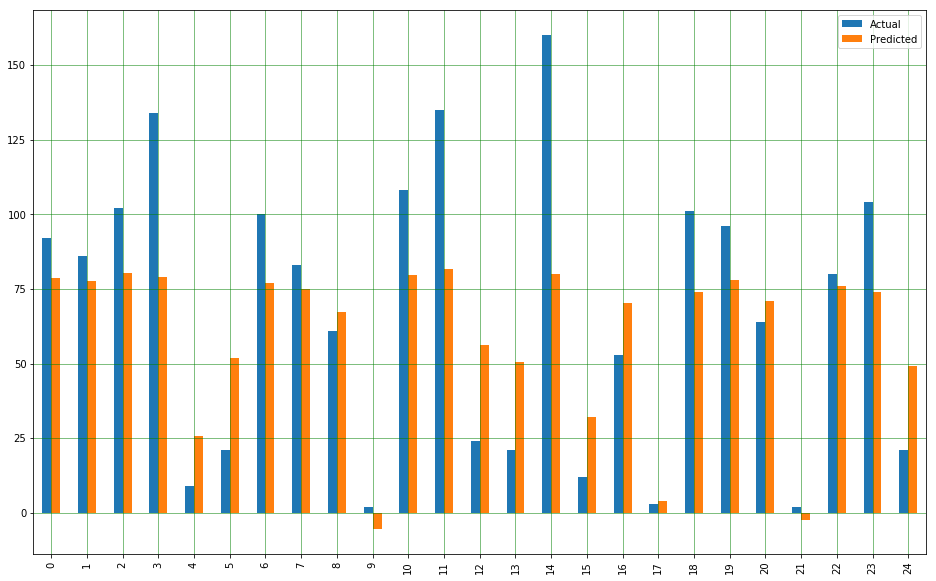

In [102]:
#actual rank vs predicted rank bar graph
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

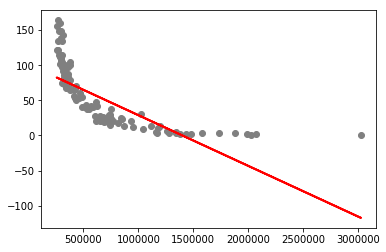

In [103]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [104]:
#save the conituous stream to csv file
data.to_csv("streams_continuous.csv")